# PARTE A

### 1 Dataset - Heart Disease "UCI"

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np

# Cargar dataset
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets

print("Dimensiones originales:", X.shape, y.shape)
print("Primeras filas de las variables explicativas:")
display(X.head())

print("Primeras filas de la variable objetivo:")
display(y.head())

# Aplanar y y recodificar como binaria
y = y.values.ravel()
y = np.where(y > 0, 1, 0)

print("\nValores únicos en y después de recodificar:", np.unique(y))



Dimensiones originales: (303, 13) (303, 1)
Primeras filas de las variables explicativas:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


Primeras filas de la variable objetivo:


,num
0,0
1,2
2,1
3,0
4,0



Valores únicos en y después de recodificar: [0 1]


### 2 Preprocesamiento "Estandarizar, codificar, dividir train/test"

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identificar columnas numéricas y categóricas
num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(exclude=['int64', 'float64']).columns

# Transformador: escalar numéricas y codificar categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
    ]
)

# Aplicar transformaciones
X_prepared = preprocessor.fit_transform(X)

# Dividir dataset en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.3, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (212, 13)
Tamaño del conjunto de prueba: (91, 13)


In [ ]:
# Verificar si hay valores NaN o infinitos en los datos
print("NaN en X_train:", np.isnan(X_train).sum())
print("Infinitos en X_train:", np.isinf(X_train).sum())

# Reemplazar posibles NaN por 0 (o la media de la columna)
X_train = np.nan_to_num(X_train, nan=0.0, posinf=0.0, neginf=0.0)
X_test = np.nan_to_num(X_test, nan=0.0, posinf=0.0, neginf=0.0)


NaN en X_train: 4
Infinitos en X_train: 0


### 3 Implementación de Regresión Logistica "Gradient Descent" - DESDE CERO

Primeros valores de costo (lr=0.01): [np.float64(0.6931471803599452), np.float64(0.5606028056380902), np.float64(0.49326720633793514), np.float64(0.45481631753078516), np.float64(0.43059731136118407)]
Primeros valores de costo (lr=0.1): [np.float64(0.6931471803599452), np.float64(0.37638683161335185), np.float64(0.35592784158776003), np.float64(0.3484343809695795), np.float64(0.3444657244654961)]


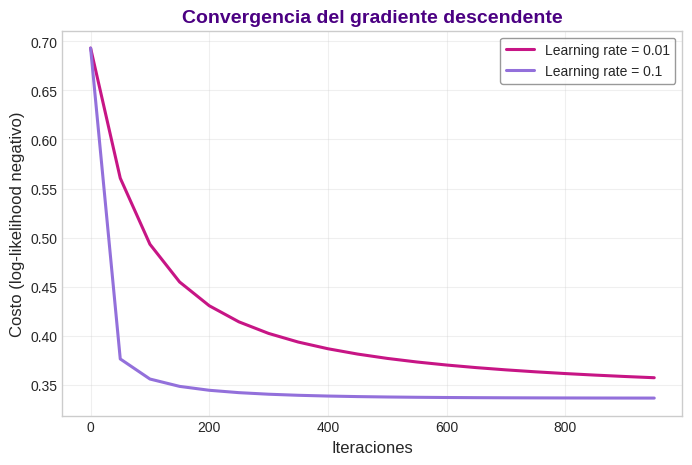

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Asegurar que X_train y y_train sean arrays planos y sin NaN
X_train = np.array(X_train, dtype=float)
y_train = np.array(y_train, dtype=float).reshape(-1)

X_train = np.nan_to_num(X_train, nan=0.0, posinf=0.0, neginf=0.0)
y_train = np.nan_to_num(y_train, nan=0.0)

# Función sigmoide
def sigmoid(z):
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

# Función de costo
def compute_cost(y, y_pred):
    m = len(y)
    epsilon = 1e-10
    return -(1/m) * np.sum(y*np.log(y_pred + epsilon) + (1-y)*np.log(1 - y_pred + epsilon))

# Gradiente descendente
def gradient_descent(X, y, lr=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros(n)
    bias = 0
    costs = []

    for i in range(epochs):
        z = np.dot(X, theta) + bias
        y_pred = sigmoid(z)

        d_theta = (1/m) * np.dot(X.T, (y_pred - y))
        d_bias = (1/m) * np.sum(y_pred - y)

        theta -= lr * d_theta
        bias -= lr * d_bias

        if i % 50 == 0:
            cost = compute_cost(y, y_pred)
            costs.append(cost)

    return theta, bias, costs

# Entrenar con dos learning rates
theta1, bias1, cost1 = gradient_descent(X_train, y_train, lr=0.01, epochs=1000)
theta2, bias2, cost2 = gradient_descent(X_train, y_train, lr=0.1, epochs=1000)

# Mostrar primeros costos para comprobar
print("Primeros valores de costo (lr=0.01):", cost1[:5])
print("Primeros valores de costo (lr=0.1):", cost2[:5])

# Gráfica
plt.figure(figsize=(8,5))
plt.style.use('seaborn-v0_8-whitegrid')

plt.plot(range(0, len(cost1)*50, 50), cost1,
         color="#C71585", linewidth=2.2, label='Learning rate = 0.01')  # rosa fuerte
plt.plot(range(0, len(cost2)*50, 50), cost2,
         color="#9370DB", linewidth=2.2, label='Learning rate = 0.1')  # lila

plt.xlabel('Iteraciones', fontsize=12)
plt.ylabel('Costo (log-likelihood negativo)', fontsize=12)
plt.title('Convergencia del gradiente descendente', fontsize=14, fontweight='bold', color='#4B0082')
plt.legend(frameon=True, edgecolor='gray')
plt.grid(alpha=0.3)
plt.show()


Interpretación:

En el gráfico se observa la convergencia del gradiente descendente para dos tasas de aprendizaje.
Ambas curvas muestran una disminución del costo (log-likelihood negativo) a medida que aumentan las iteraciones, lo que indica que el modelo está aprendiendo correctamente.
La tasa de aprendizaje 0.1 converge más rápido que la 0.01, alcanzando un costo mínimo en menos iteraciones.
Sin embargo, ambas llegan a valores similares de costo final, demostrando que el algoritmo es estable y que ambas tasas permiten una convergencia efectiva.

###4 Evaluación del Modelo

Modelo desde cero
Accuracy : 0.8571
Precision: 0.8409
Recall   : 0.8605
F1 Score : 0.8506


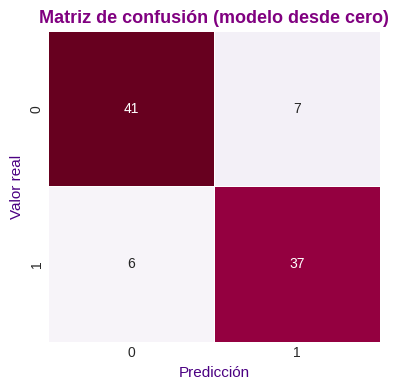

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Asegurar que X_test sea array numérico
X_test = np.array(X_test, dtype=float)
y_test = np.array(y_test, dtype=float).reshape(-1)

# --- Predicciones con el modelo desde cero ---
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

y_pred_prob = sigmoid(np.dot(X_test, theta1) + bias1)
y_pred = np.where(y_pred_prob >= 0.5, 1, 0)

# --- Métricas del modelo desde cero ---
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Modelo desde cero")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")

# --- Matriz de confusión ---
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d',
            cmap='PuRd',        # paleta rosado-lila
            cbar=False,
            linewidths=0.6,
            linecolor='white')

plt.xlabel('Predicción', fontsize=11, color='#4B0082')
plt.ylabel('Valor real', fontsize=11, color='#4B0082')
plt.title('Matriz de confusión (modelo desde cero)', fontsize=13, fontweight='bold', color='#800080')
plt.tight_layout()
plt.show()


Interpretación:

La matriz de confusión muestra que el modelo desde cero clasifica correctamente a la mayoría de los casos: 41 verdaderos negativos y 37 verdaderos positivos, con solo 7 falsos positivos y 6 falsos negativos.
Esto se refleja en un accuracy del 85.7 %, precisión del 84 % y recall del 86 %, lo que indica un buen equilibrio entre la detección de pacientes con enfermedad cardíaca y la correcta identificación de los sanos.
En conjunto, el modelo demuestra un desempeño confiable y una capacidad predictiva estable.

Comparación con LogisticRegression "sklearn"

In [ ]:
# Entrenar modelo con sklearn
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_sklearn = logreg.predict(X_test)

# Métricas del modelo sklearn
acc_s = accuracy_score(y_test, y_pred_sklearn)
prec_s = precision_score(y_test, y_pred_sklearn)
rec_s = recall_score(y_test, y_pred_sklearn)
f1_s = f1_score(y_test, y_pred_sklearn)

print("\nModelo con sklearn")
print(f"Accuracy : {acc_s:.4f}")
print(f"Precision: {prec_s:.4f}")
print(f"Recall   : {rec_s:.4f}")
print(f"F1 Score : {f1_s:.4f}")

# Comparación visual de métricas
df_compare = pd.DataFrame({
    "Modelo": ["Desde Cero", "Sklearn"],
    "Accuracy": [acc, acc_s],
    "Precision": [prec, prec_s],
    "Recall": [rec, rec_s],
    "F1": [f1, f1_s]
})

print("\nComparación de métricas")
display(df_compare)



Modelo con sklearn
Accuracy : 0.8352
Precision: 0.7917
Recall   : 0.8837
F1 Score : 0.8352

Comparación de métricas


,Modelo,Accuracy,Precision,Recall,F1
0,Desde Cero,0.857143,0.840909,0.860465,0.850575
1,Sklearn,0.835165,0.791667,0.883721,0.835165


Interpretación:

Ambos modelos, el implementado desde cero o Gradient Descent y el de sklearn, muestran un rendimiento similar, con métricas superiores al 83 %.
El modelo desde cero logra mayor precisión, mientras que el de sklearn alcanza mejor recall.
Estas pequeñas diferencias a experiencia de ya haber usado este modelo para mi investigación sobre anemia en niños menores de 5 años en Puno con el mismo método es por el uso de regularización en sklearn, y confirman que la regresión logística fue implementada correctamente y predice de forma confiable la enfermedad cardíaca.

#PARTE B

###4 Dataset y preprocesamiento

In [ ]:
# Parte B: Multiclass Logistic Regression (One-vs-All)
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Cargar dataset
wine = load_wine()
X = wine.data
y = wine.target

print("Dimensiones del dataset:", X.shape)
print("Clases únicas:", np.unique(y))

# Estandarizar características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Train:", X_train.shape, "Test:", X_test.shape)


Dimensiones del dataset: (178, 13)
Clases únicas: [0 1 2]
Train: (124, 13) Test: (54, 13)


###5 Implementación One vs All

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(y, y_pred):
    m = len(y)
    eps = 1e-10
    return -(1/m) * np.sum(y*np.log(y_pred+eps) + (1-y)*np.log(1-y_pred+eps))

def gradient_descent(X, y, lr=0.05, epochs=2000):
    m, n = X.shape
    theta = np.zeros(n)
    bias = 0
    for i in range(epochs):
        z = np.dot(X, theta) + bias
        y_pred = sigmoid(z)
        d_theta = (1/m) * np.dot(X.T, (y_pred - y))
        d_bias = (1/m) * np.sum(y_pred - y)
        theta -= lr * d_theta
        bias -= lr * d_bias
    return theta, bias

# Entrenar tres clasificadores (uno por clase)
classes = np.unique(y_train)
thetas = []
biases = []

for c in classes:
    y_binary = (y_train == c).astype(int)
    theta_c, bias_c = gradient_descent(X_train, y_binary, lr=0.05, epochs=2000)
    thetas.append(theta_c)
    biases.append(bias_c)
    print(f"Entrenado clasificador para clase {c}")


Entrenado clasificador para clase 0
Entrenado clasificador para clase 1
Entrenado clasificador para clase 2


Predicción multiclase

In [ ]:
import numpy as np

# Función de predicción multiclase usando los clasificadores entrenados
def predict_multiclass(X, thetas, biases):
    probs = []
    for theta, bias in zip(thetas, biases):
        z = np.dot(X, theta) + bias
        probs.append(1 / (1 + np.exp(-z)))  # probabilidad sigmoide
    probs = np.array(probs).T  # filas: observaciones, columnas: clases
    return np.argmax(probs, axis=1)        # clase con mayor probabilidad

# Predecir clases en el conjunto de prueba
y_pred = predict_multiclass(X_test, thetas, biases)

print("Predicciones generadas con éxito.")
print("Ejemplo de primeras predicciones:", y_pred[:10])
print("Clases reales correspondientes:", y_test[:10])


Predicciones generadas con éxito.
Ejemplo de primeras predicciones: [0 0 2 0 1 0 1 2 1 2]
Clases reales correspondientes: [0 0 2 0 1 0 1 2 1 2]


Evaluación

Accuracy del modelo OvA: 0.9815


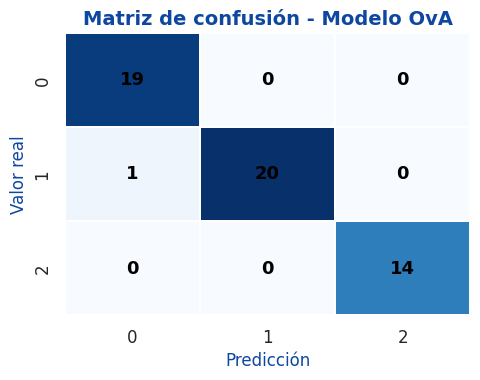

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calcular matriz de confusión y accuracy
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy del modelo OvA: {acc:.4f}")

# Matriz
plt.figure(figsize=(5,4))
sns.heatmap(
    cm, annot=True, fmt='d',
    cmap='Blues',            #paleta de azules
    cbar=False,
    linewidths=1.2,
    linecolor='white',
    annot_kws={"size": 13, "weight": "bold", "color": "black"}
)

plt.title('Matriz de confusión - Modelo OvA',
          fontsize=14, fontweight='bold', color='#0D47A1')
plt.xlabel('Predicción', fontsize=12, color='#0D47A1')
plt.ylabel('Valor real', fontsize=12, color='#0D47A1')
plt.tight_layout()
plt.show()


Interpretación:

El modelo OvA logró un accuracy de 98.15 %, mostrando una excelente capacidad para distinguir las tres clases de vino.
La matriz de confusión evidencia que casi todas las observaciones fueron clasificadas correctamente, con solo un error leve en la clase 1.
En conjunto, el modelo presenta un desempeño muy alto, preciso y estable en la predicción multiclase.



###6 Comparación con Sklearn

Accuracy del modelo sklearn OvR: 0.9815


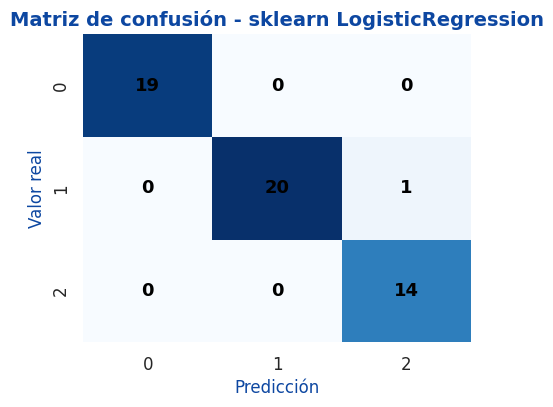


Comparación de desempeño:
Modelo OvA propio   : 0.9815
Modelo sklearn OvR  : 0.9815


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# Entrenar modelo con sklearn (One-vs-Rest)
model_sklearn = LogisticRegression(multi_class='ovr', max_iter=1000)
model_sklearn.fit(X_train, y_train)

# Predicciones
y_pred_sklearn = model_sklearn.predict(X_test)

# Calcular métricas
acc_sklearn = accuracy_score(y_test, y_pred_sklearn)
cm_sklearn = confusion_matrix(y_test, y_pred_sklearn)

print(f"Accuracy del modelo sklearn OvR: {acc_sklearn:.4f}")

# Matriz
plt.figure(figsize=(5,4))
sns.heatmap(cm_sklearn, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={"size": 13, "weight": "bold", "color": "black"})
plt.title('Matriz de confusión - sklearn LogisticRegression', fontsize=14, fontweight='bold', color='#0D47A1')
plt.xlabel('Predicción', fontsize=12, color='#0D47A1')
plt.ylabel('Valor real', fontsize=12, color='#0D47A1')
plt.show()

# Comparación de accuracy
print("\nComparación de desempeño:")
print(f"Modelo OvA propio   : {acc:.4f}")
print(f"Modelo sklearn OvR  : {acc_sklearn:.4f}")


#PARTE C

## 7. Teoría – Derivación del gradiente de la función de log-verosimilitud

La regresión softmax es una extensión multiclase de la regresión logística binaria.  
Permite clasificar observaciones en más de dos categorías usando una función softmax que transforma puntajes lineales en probabilidades.

### 1. Función Softmax

Dada una observación **x** y un conjunto de parámetros **θ₁, θ₂, ..., θₖ** (uno por clase),  
la probabilidad de pertenecer a la clase *k* se define como:

$$
P(y=k|x) = \frac{e^{\theta_k^T x}}{\sum_{l=1}^{K} e^{\theta_l^T x}}
$$

donde:  
- **θₖ** es el vector de pesos para la clase *k*,  
- **e^{θₖᵀx}** transforma el puntaje lineal en una escala positiva,  
- y el denominador asegura que las probabilidades sumen 1.

### 2. Log-verosimilitud

Dado un conjunto de datos con pares de observaciones y clases verdaderas,  
la verosimilitud del modelo es:

$$
L(\theta) = \prod_{i=1}^n P(y^{(i)}|x^{(i)}; \theta)
$$

Tomando logaritmos (para simplificar el cálculo), se obtiene la **log-verosimilitud**:

$$
\ell(\theta) = \sum_{i=1}^n \log P(y^{(i)}|x^{(i)}; \theta)
$$

Sustituyendo la definición de la función softmax:

$$
\ell(\theta) =
\sum_{i=1}^n
\left[
\theta_{y^{(i)}}^T x^{(i)}
-
\log \sum_{l=1}^{K} e^{\theta_l^T x^{(i)}}
\right]
$$

El primer término recompensa las clases correctas (mayor probabilidad),  
mientras que el segundo término penaliza la suma de probabilidades de todas las clases.

### 3. Derivación del gradiente

Queremos obtener la derivada de la log-verosimilitud con respecto a cada vector de parámetros **θₗ**.

**Primer término:**

$$
\frac{\partial (\theta_{y^{(i)}}^T x^{(i)})}{\partial \theta_l}
=
\begin{cases}
x^{(i)} & \text{si } y^{(i)} = l \\
0 & \text{si } y^{(i)} \neq l
\end{cases}
$$

Esto se puede escribir usando la función indicadora:

$$
\mathbb{1}\{y^{(i)} = l\} \, x^{(i)}
$$

**Segundo término:**

$$
\frac{\partial}{\partial \theta_l}
\log \sum_{j=1}^K e^{\theta_j^T x^{(i)}}
=
\frac{e^{\theta_l^T x^{(i)}}}{\sum_{j=1}^K e^{\theta_j^T x^{(i)}}} \, x^{(i)}
=
P(y=l|x^{(i)}) \, x^{(i)}
$$

Combinando ambos resultados, se obtiene el gradiente final:

$$
\nabla_{\theta_l} \ell(\theta)
=
\sum_{i=1}^n
x^{(i)}
\left(
\mathbb{1}\{y^{(i)} = l\} - P(y=l|x^{(i)})
\right)
$$

### 4. Interpretación

- El término **𝟙{y⁽ⁱ⁾ = l}** indica si la observación pertenece a la clase *l*.  
- **P(y=l|x⁽ⁱ⁾)** es la probabilidad predicha por el modelo.  
- La diferencia entre ambos mide el **error de predicción** por clase.  
- Multiplicar por **x⁽ⁱ⁾** pondera el error según las características de entrada.



###8 IMPLEMENTACIÓN (SOFTMAX DESDE CERO)



Dataset preparado: 124 observaciones, 13 variables, 3 clases


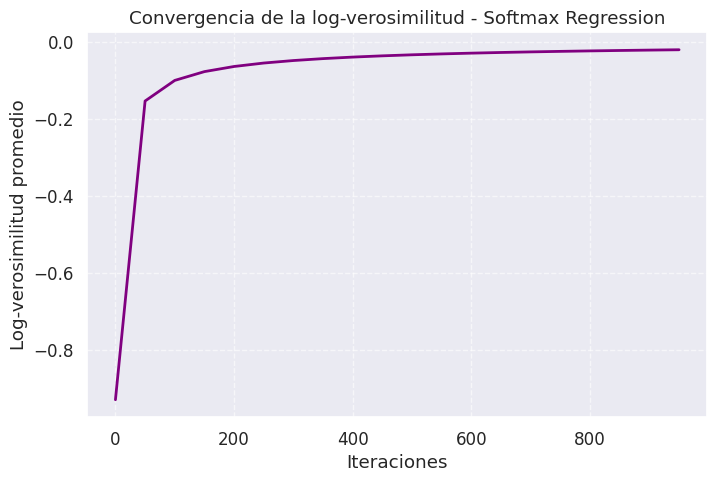

Accuracy del modelo Softmax (desde cero): 0.9815


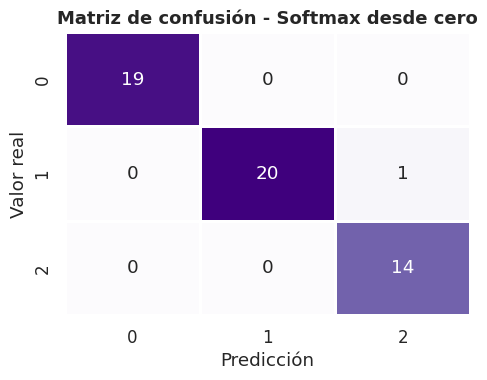

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# 1. Cargar y preparar dataset (Wine)
wine = load_wine()
X = wine.data
y = wine.target
K = len(np.unique(y))  # número de clases

# Estandarizar las características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# División en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
n, d = X_train.shape

print(f"Dataset preparado: {X_train.shape[0]} observaciones, {d} variables, {K} clases")

# 2. Funciones auxiliares
def softmax(z):
    """Función softmax con estabilidad numérica"""
    z = z - np.max(z, axis=1, keepdims=True)  # evita overflow
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def compute_log_likelihood(X, y, Theta):
    """Calcula la log-verosimilitud promedio"""
    scores = X @ Theta
    probs = softmax(scores)
    log_likelihood = np.mean(np.log(probs[np.arange(len(y)), y] + 1e-10))
    return log_likelihood

# 3. Descenso de gradiente para Softmax
def softmax_regression(X, y, lr=0.1, epochs=1000):
    """Entrena un modelo Softmax desde cero"""
    n, d = X.shape
    K = len(np.unique(y))
    Theta = np.zeros((d, K))  # pesos iniciales
    log_likelihoods = []

    for epoch in range(epochs):
        # 1. Forward pass
        scores = X @ Theta
        probs = softmax(scores)

        # 2. One-hot encoding implícito
        Y_true = np.zeros_like(probs)
        Y_true[np.arange(n), y] = 1

        # 3. Gradiente según la Parte 7
        grad = X.T @ (Y_true - probs) / n

        # 4. Actualización de parámetros
        Theta += lr * grad

        # 5. Guardar log-verosimilitud cada 50 épocas
        if epoch % 50 == 0:
            ll = compute_log_likelihood(X, y, Theta)
            log_likelihoods.append(ll)

    return Theta, log_likelihoods

# 4. Entrenamiento del modelo
Theta, log_likelihoods = softmax_regression(X_train, y_train, lr=0.1, epochs=1000)

# 5. Monitorear convergencia
plt.figure(figsize=(8, 5))
plt.plot(np.arange(0, len(log_likelihoods) * 50, 50), log_likelihoods, color='purple', linewidth=2)
plt.xlabel("Iteraciones")
plt.ylabel("Log-verosimilitud promedio")
plt.title("Convergencia de la log-verosimilitud - Softmax Regression")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 6. Predicciones y evaluación
scores_test = X_test @ Theta
probs_test = softmax(scores_test)
y_pred = np.argmax(probs_test, axis=1)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo Softmax (desde cero): {accuracy:.4f}")

# 7. Matriz de confusión profesional
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Purples',
    cbar=False, linewidths=1, linecolor='white'
)
plt.title("Matriz de confusión - Softmax desde cero", fontsize=13, weight='bold')
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.tight_layout()
plt.show()


Interpretación:

El modelo Softmax desde cero mostró un alto desempeño con una accuracy de 0.9815, lo que indica que clasifica correctamente casi todas las observaciones.
La gráfica de log-verosimilitud evidencia una convergencia estable y rápida, entonces mi entrenamiento correcto.
La matriz de confusión muestra predicciones casi perfectas, con solo un error mínimo.
En conjunto, los resultados confirman que el modelo aprendió eficazmente los parámetros y que la implementación del gradiente fue correcta.

###9 Evaluación y comparación con sklearn

Accuracy del modelo Softmax (desde cero): 0.9815
Accuracy del modelo sklearn (multinomial): 0.9815


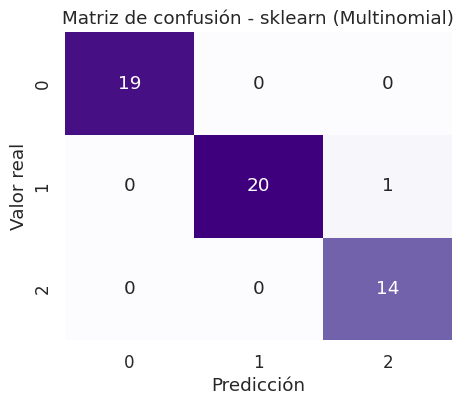


Comparación de desempeño:
Modelo Softmax desde cero  : 0.9815
Modelo sklearn (multinomial): 0.9815


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# Modelo multinomial con sklearn
model_sklearn = LogisticRegression(
    multi_class="multinomial", solver="lbfgs", max_iter=1000
)
model_sklearn.fit(X_train, y_train)
y_pred_sklearn = model_sklearn.predict(X_test)

# --- Corrección: Alinear dimensiones ---
# En tu modelo Softmax, Theta tiene forma (13, 3)
# Por tanto, no se debe transponer aquí
y_pred_softmax = np.argmax(np.dot(X_test, Theta), axis=1)

# Accuracy de ambos modelos
acc_softmax = accuracy_score(y_test, y_pred_softmax)
acc_sklearn = accuracy_score(y_test, y_pred_sklearn)

print(f"Accuracy del modelo Softmax (desde cero): {acc_softmax:.4f}")
print(f"Accuracy del modelo sklearn (multinomial): {acc_sklearn:.4f}")

# Matriz de confusión sklearn
cm_sklearn = confusion_matrix(y_test, y_pred_sklearn)

plt.figure(figsize=(5, 4))
sns.heatmap(cm_sklearn, annot=True, fmt='d', cmap='Purples', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de confusión - sklearn (Multinomial)')
plt.show()

# Comparación general
print("\nComparación de desempeño:")
print(f"Modelo Softmax desde cero  : {acc_softmax:.4f}")
print(f"Modelo sklearn (multinomial): {acc_sklearn:.4f}")


Interpretación:

Ambos modelos el Softmax implementado desde cero y el LogisticRegression "multinomial" de sklearn alcanzaron una precisión del 98.15 %, lo que indica un desempeño prácticamente idéntico.
La matriz de confusión muestra que casi todas las observaciones fueron clasificadas correctamente, con solo un error leve en una clase.
Esto confirma que mi implementación desde cero refleja bien el comportamiento del modelo multinomial estándar y optimiza correctamente la log-verosimilitud.